# Investigating Generalisation of Graph Neural Networks for Autism Classification on Heterogeneous fMRI Datasets via Domain Adaptation

## Results Analysis 

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [105]:
# Load CSVs 
BASE_PATH ="/Users/jessessempijja/Documents/Adulting/Education/MSc/Dissertation/Results/"

dsam_baseline = pd.read_csv(f"{BASE_PATH}Baseline-dsam_metrics_summary - final.csv")
dsam_grl = pd.read_csv(f"{BASE_PATH}GRL-dsam_metrics_summary - final.csv")
bgnn_baseline = pd.read_csv(f"{BASE_PATH}Baseline-braingnn_metrics_summary - final.csv")
bgnn_grl = pd.read_csv(f"{BASE_PATH}GRL-braingnn_metrics_summary - final.csv")
bnt_baseline = pd.read_csv(f"{BASE_PATH}Baseline-bnt_metrics_summary - final.csv")
bnt_grl = pd.read_csv(f"{BASE_PATH}GRL-bnt_metrics_summary - final.csv")

In [106]:
# Label models
dsam_baseline["Model"] = "DSAM"
dsam_baseline["GRL"] = "No"
dsam_grl["Model"] = "DSAM"
dsam_grl["GRL"] = "Yes"
bgnn_baseline["Model"] = "BrainGNN"
bgnn_baseline["GRL"] = "No"
bgnn_grl["Model"] = "BrainGNN"
bgnn_grl["GRL"] = "Yes"
bnt_baseline["Model"] = "BNT"
bnt_baseline["GRL"] = "No"
bnt_grl["Model"] = "BNT"
bnt_grl["GRL"] = "Yes"

metrics = ['accuracy', 'auc', 'balanced_accuracy', 'sensitivity', 'specificity', 'f1_score']

dsam_results = pd.concat([dsam_baseline, dsam_grl], ignore_index=True)
bgnn_results = pd.concat([bgnn_baseline, bgnn_grl], ignore_index=True)
bnt_results = pd.concat([bnt_baseline, bnt_grl], ignore_index=True)


### DSAM 


In [ ]:
#print table showing dsam baseline model results
print("DSAM Baseline Model Results")
print(dsam_baseline.describe())

DSAM Baseline Model Results
        site  accuracy       auc  sensitivity  specificity  f1_score  \
0    CALTECH  0.540541  0.652047     0.888889     0.210526  0.653061   
1        CMU  0.481481  0.543956     0.153846     0.785714  0.222222   
2        KKI  0.458333  0.708929     0.142857     0.900000  0.235294   
3   LEUVEN_1  0.758621  0.861905     0.600000     0.928571  0.720000   
4   LEUVEN_2  0.735294  0.778947     0.684210     0.800000  0.742857   
5    MAX_MUN  0.687500  0.700000     0.833333     0.600000  0.666667   
6        NYU  0.765714  0.908133     0.960000     0.506667  0.824034   
7       OLIN  0.676471  0.838596     0.333333     0.947368  0.476190   
8       PITT  0.928571  0.970626     0.962963     0.896552  0.928571   
9        SBL  0.833333  0.897778     0.666667     1.000000  0.800000   
10      SDSU  0.916667  0.964286     0.863636     1.000000  0.926829   
11  STANFORD  0.871795  0.934211     0.800000     0.947368  0.864865   
12   TRINITY  0.744681  0.905455    

In [93]:
# print table showing dsam grl model results
print("\nDSAM GRL Model Results")
print(dsam_grl.describe())


DSAM GRL Model Results
        accuracy        auc  sensitivity  specificity   f1_score  \
count  17.000000  17.000000    17.000000    17.000000  17.000000   
mean    0.715827   0.774376     0.736704     0.684946   0.704702   
std     0.158515   0.196305     0.250985     0.296881   0.192795   
min     0.437500   0.291209     0.166667     0.052632   0.285714   
25%     0.642857   0.664112     0.733333     0.666667   0.631579   
50%     0.742857   0.891064     0.811321     0.785714   0.800000   
75%     0.851064   0.920000     0.900000     0.863636   0.857143   
max     0.892857   0.952806     1.000000     1.000000   0.913043   

       balanced_accuracy  
count          17.000000  
mean            0.710825  
std             0.154960  
min             0.458791  
25%             0.583333  
50%             0.716667  
75%             0.851818  
max             0.892857  


In [94]:

dsam_std = dsam_results.groupby(['Model', 'GRL'])[metrics].std().reset_index()
dsam_mean = dsam_results.groupby(['Model', 'GRL'])[metrics].mean().reset_index()

dsam_std_melted = dsam_std.melt(id_vars=['Model', 'GRL'], value_vars=metrics, var_name='Metric', value_name='STD')
dsam_mean_melted = dsam_mean.melt(id_vars=['Model', 'GRL'], value_vars=metrics, var_name='Metric', value_name='Mean')

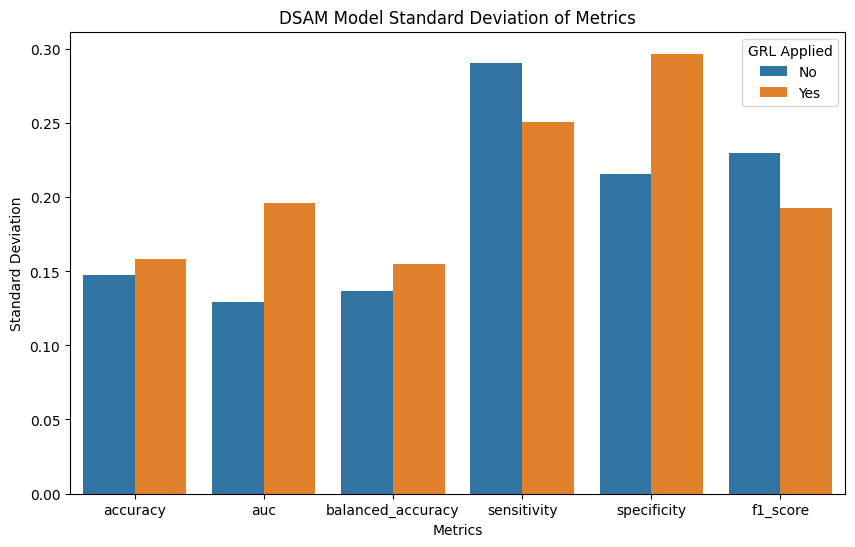

In [95]:
# dsam std plot
plt.figure(figsize=(10, 6))
sns.barplot(data=dsam_std_melted, x='Metric', y='STD', hue='GRL')
plt.title('DSAM Model Standard Deviation of Metrics')
plt.ylabel('Standard Deviation')
plt.xlabel('Metrics')
plt.legend(title='GRL Applied')
plt.show()

In [102]:
" dsam Bar Plot — Raw Metrics Comparison"

dsam_baseline_metrics = dsam_baseline[metrics].mean().values
dsam_grl_metrics = dsam_grl[metrics].mean().values

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, dsam_baseline_metrics, width, label='DSAM', color='steelblue')
plt.bar(x + width/2, dsam_grl_metrics, width, label='DSAM + GRL', color='darkorange')
plt.ylabel('Score')
plt.title('DSAM vs. DSAM+GRL Performance Comparison')
plt.xticks(x, metrics, rotation=45)
plt.ylim(0.0, 1.0)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

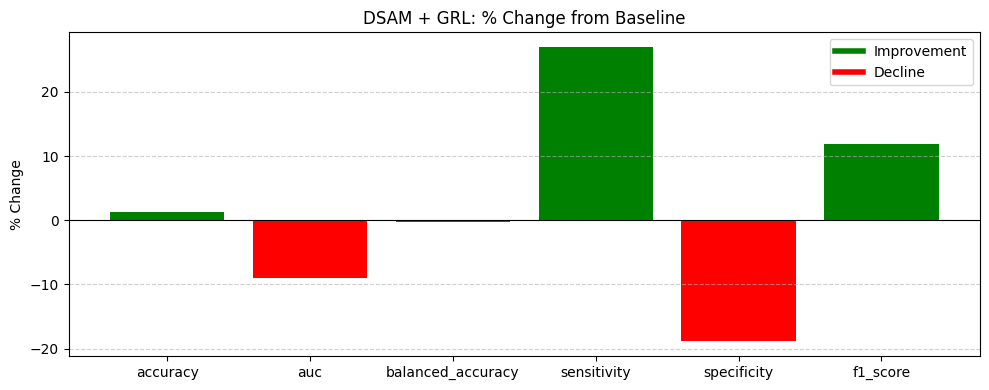

In [97]:
# dsam Delta Plot — % Change Per Metric

delta = ((dsam_grl - dsam_baseline) / dsam_baseline) * 100

colors = ['green' if d >= 0 else 'red' for d in delta]

plt.figure(figsize=(10, 4))
plt.bar(metrics, delta, color=colors)
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel('% Change')
plt.title('DSAM + GRL: % Change from Baseline')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(handles=[plt.Line2D([0], [0], color='green', lw=4, label='Improvement'),
                    plt.Line2D([0], [0], color='red', lw=4, label='Decline')])
plt.show()

In [103]:
# Plot: Sensitivity vs. Specificity (DSAM vs. DSAM+GRL)

print(dsam_baseline)
dsam_baseline_sens = dsam_baseline["sensitivity"]
dsam_baseline_spec = dsam_baseline["specificity"]
dsam_grl_sens = dsam_grl["sensitivity"]
dsam_grl_spec = dsam_grl["specificity"]

plt.figure(figsize=(12, 8))

for i, site in enumerate(sites):
    plt.arrow(dsam_baseline_spec[i], dsam_baseline_sens[i],
              dsam_grl_spec[i] - dsam_baseline_spec[i],
              dsam_grl_sens[i] - dsam_baseline_sens[i],
              head_width=0.02, head_length=0.02, fc='blue', ec='blue', alpha=0.6)
    plt.text(dsam_grl_spec[i], dsam_grl_sens[i], site, fontsize=9)

plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.title("DSAM: Per-Site Sensitivity vs. Specificity Shift (Baseline → GRL)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.5)
plt.axhline(0.5, color="gray", linestyle=":")
plt.axvline(0.5, color="gray", linestyle=":")
plt.tight_layout()
plt.show()

[0.70641547 0.85072559 0.71222165 0.58016882 0.84427441 0.62954988]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### BGNN

In [61]:
# print table showing bgnn baseline model results
print("\nBrainGNN Baseline Model Results")
print(bgnn_baseline.describe())


BrainGNN Baseline Model Results
        accuracy        auc  sensitivity  specificity   f1_score  \
count  17.000000  17.000000    17.000000    17.000000  17.000000   
mean    0.765253   0.823871     0.782963     0.751443   0.766778   
std     0.170297   0.169124     0.197745     0.191701   0.177091   
min     0.405405   0.388889     0.384615     0.315789   0.400000   
25%     0.687500   0.725000     0.666667     0.613333   0.676923   
50%     0.766667   0.886335     0.818182     0.846154   0.810811   
75%     0.896226   0.954545     0.943396     0.900000   0.904762   
max     0.957746   0.978022     1.000000     0.956522   0.960000   

       balanced_accuracy  
count          17.000000  
mean            0.767203  
std             0.168699  
min             0.407895  
25%             0.683333  
50%             0.768421  
75%             0.896226  
max             0.958261  


In [62]:
# print table showing bgnn grl model results
print("\nBrainGNN GRL Model Results")
print(bgnn_grl.describe())


BrainGNN GRL Model Results
        accuracy        auc  sensitivity  specificity   f1_score  \
count  17.000000  17.000000    17.000000    17.000000  17.000000   
mean    0.735566   0.786529     0.823390     0.639177   0.760880   
std     0.147668   0.172044     0.125766     0.235944   0.128492   
min     0.459459   0.391813     0.538461     0.285714   0.500000   
25%     0.625000   0.750877     0.800000     0.466667   0.666667   
50%     0.735294   0.789272     0.860000     0.631579   0.781818   
75%     0.871795   0.925455     0.880000     0.866667   0.864865   
max     0.911765   0.985348     1.000000     0.947368   0.933333   

       balanced_accuracy  
count          17.000000  
mean            0.731283  
std             0.142489  
min             0.461988  
25%             0.630268  
50%             0.749123  
75%             0.873684  
max             0.894545  


In [63]:

bgnn_std = bgnn_results.groupby(['Model', 'GRL'])[metrics].std().reset_index()
bgnn_mean = bgnn_results.groupby(['Model', 'GRL'])[metrics].mean().reset_index()

bgnn_std_melted = bgnn_std.melt(id_vars=['Model', 'GRL'], value_vars=metrics, var_name='Metric', value_name='STD')
bgnn_mean_melted = bgnn_mean.melt(id_vars=['Model', 'GRL'], value_vars=metrics, var_name='Metric', value_name='Mean')

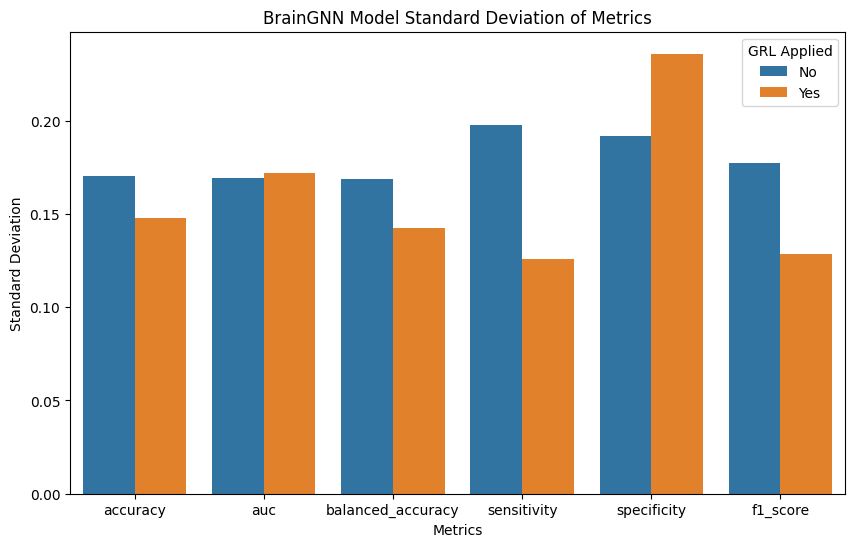

In [64]:
# plot std for bgnn
plt.figure(figsize=(10, 6))
sns.barplot(data=bgnn_std_melted, x='Metric', y='STD', hue='GRL')
plt.title('BrainGNN Model Standard Deviation of Metrics')
plt.ylabel('Standard Deviation')
plt.xlabel('Metrics')
plt.legend(title='GRL Applied')
plt.show()

In [65]:
# Combine
df_all = pd.concat([dsam_baseline, dsam_grl, bgnn_baseline, bgnn_grl], ignore_index=True)


In [38]:
# Clean
df_all = df_all[df_all["site"] != "TOTAL"]
df_all = df_all[df_all["auc"].notna()]

In [39]:
# Pivot for plotting
pivot_auc = df_all.pivot_table(index="site", columns=["Model", "GRL"], values="auc")


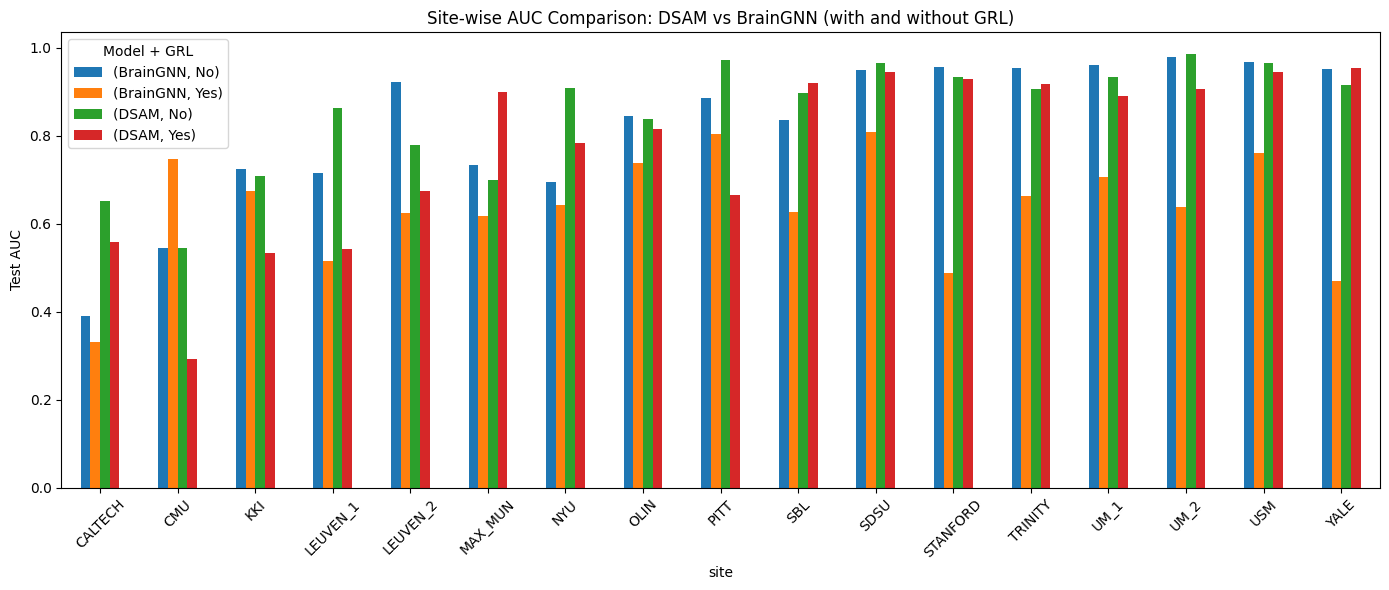

In [40]:
# Plot
ax = pivot_auc.plot(kind="bar", figsize=(14, 6), rot=45)
ax.set_ylabel("Test AUC")
ax.set_title("Site-wise AUC Comparison: DSAM vs BrainGNN (with and without GRL)")
ax.legend(title="Model + GRL")
plt.tight_layout()
plt.show()